<a href="https://colab.research.google.com/github/hysakada/IA-FER/blob/master/videoAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
import time

timer_a = time.time()
timer_b = time.time()

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')


emotionsCount =[0,0,0,0,0,0,0]
emotions=("Felicidade", "Surpresa", "Nojo","Raiva","Medo","Tristeza","Neutro")
emotionsResult=[0,0,0,0,0,0,0]
maior=0 ; index=0 ; total=0; result=0
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture('http://192.168.1.2:4747/video') #IP do APP Droidcam do celular

while time.time() - timer_b < 60: #60= segundos que vai ficar ligado
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    
    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        probabilidade=round(predictions[0,np.argmax(predictions)],2)
        print(probabilidade,emotions[np.argmax(predictions)])
        if probabilidade >= 0.7:
            result = np.argmax(predictions[0])#guardando o resultado da emoção (numerico)
            emotionsCount[result]=emotionsCount[result]+1#guardando a quantidade de vezes que a emoção foi captada

        for ind in range(7): #verificando qual foi a emoção que mais foi capturada
          if emotionsCount[ind] > maior:
             maior=emotionsCount[ind]
             index=ind #guardando o index da emoção mais captada

        if time.time() - timer_a > 2: #após 2 segundos vou pegar a emoção que mais foi capturada e fazer ela ser contabilizada 
           timer_a=time.time()
           emotionsResult[index] =  emotionsResult[index]+1 
           total=total+1
           emotionsCount=[0,0,0,0,0,0,0]
           maior=0

        

        cv2.putText(test_img, emotions[result], (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        cap.release()
        cv2.destroyAllWindows
        break



0.86 Nojo
0.95 Nojo
0.87 Nojo
0.59 Neutro
0.72 Neutro
0.39 Raiva
0.93 Neutro
0.85 Neutro
0.44 Nojo
0.71 Neutro
0.42 Neutro
0.56 Neutro
0.52 Nojo
0.82 Neutro
0.62 Neutro
0.48 Neutro
0.41 Nojo
0.54 Neutro
0.68 Neutro
0.94 Neutro
0.76 Neutro
0.6 Neutro
0.45 Neutro
0.73 Neutro
0.48 Neutro
0.53 Neutro
0.66 Neutro
0.8 Neutro
0.64 Neutro
0.68 Neutro
0.58 Neutro
0.69 Neutro
0.36 Raiva
0.7 Neutro
0.29 Felicidade
0.59 Neutro
0.52 Neutro
0.52 Neutro
0.49 Neutro
0.39 Neutro
0.37 Felicidade
0.82 Neutro
0.55 Neutro
0.65 Neutro
0.86 Neutro
0.89 Nojo
0.61 Neutro
0.55 Nojo
0.53 Neutro
0.71 Neutro
0.67 Neutro
0.89 Neutro
0.57 Neutro
0.52 Neutro
0.79 Neutro
0.63 Neutro
0.69 Neutro
0.79 Neutro
0.73 Neutro
0.43 Neutro
0.4 Neutro
0.63 Neutro
0.59 Neutro
0.86 Neutro
0.76 Neutro
0.6 Neutro
0.67 Neutro
0.67 Neutro
0.73 Neutro
0.87 Neutro
0.35 Neutro
0.66 Neutro
0.82 Neutro
0.98 Neutro
0.53 Neutro
0.63 Neutro
0.5 Neutro
0.71 Neutro
0.68 Neutro
0.65 Neutro
0.85 Neutro
0.74 Neutro
0.75 Neutro
0.73 Neutro
0.52 Neu

''

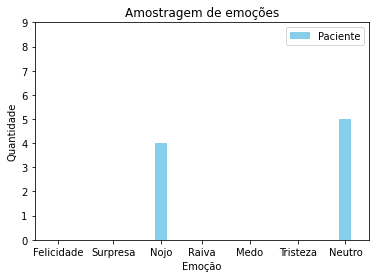

In [14]:
import pandas as pd
import matplotlib
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF


totalEmocao= sum(emotionsResult)

df = pd.DataFrame()
df['Emoções'] = ["Felicidade", "Surpresa", "Nojo","Raiva","Medo","Tristeza","Neutro"]
df['Paciente'] = [emotionsResult[0],emotionsResult[1],emotionsResult[2],emotionsResult[3],emotionsResult[4],emotionsResult[5],emotionsResult[6]]


title("Amostragem de emoções")
xlabel('Emoção')
ylabel('Quantidade')

c = [2.0, 4.3, 6.3, 8.0,10.0,12.0,14.0]
m = [x - 0 for x in c]

xticks(c, df['Emoções'])

bar(m, df['Paciente'], width=0.5, color="skyblue", label="Paciente")


legend()
axis([1, 15, 0, totalEmocao]) #configuração do grafico
savefig('barchart.png')



pdf = FPDF()
pdf.add_page()

pdf.image('barchart.png', x = 0, y = 0, w = 200, h =150, type = '', link = '')
pdf.image('feliz.jpg', x = 10, y = 160, w = 10, h = 10, type = '', link = '')  
pdf.image('surpresa.png', x = 10, y = 180, w = 10, h = 10, type = '', link = '')
pdf.image('nojo.png', x = 10, y = 200, w = 10, h = 10, type = '', link = '')
pdf.image('raiva.png', x = 10, y = 220, w = 10, h = 10, type = '', link = '')
pdf.image('medo.png', x = 10, y = 240, w = 10, h = 10, type = '', link = '')
pdf.image('triste.jpg', x = 10, y = 260, w = 10, h = 10, type = '', link = '')
pdf.image('neutro.png', x = 10, y = 280, w = 10, h = 10, type = '', link = '')


#aqui em baixo está calculando a porcentagem de cada emoção e transformando em string
feliz=str(round((emotionsResult[0]/total)*100))
surpresa=str(round((emotionsResult[1]/total)*100))
nojo=str(round((emotionsResult[2]/total)*100))
raiva=str(round((emotionsResult[3]/total)*100))
medo=str(round((emotionsResult[4]/total)*100))
triste=str(round((emotionsResult[5]/total)*100))
neutro=str(round((emotionsResult[6]/total)*100))

pdf.set_font('arial', 'B', 12)
#pdf.cell(50, 300, "Tabela", 0, 0, 'l')
pdf.text(22,166,feliz+"%") #feliz
pdf.text(22,186,surpresa+"%") #surpresa
pdf.text(22,206,nojo+"%") #nojo
pdf.text(22,226,raiva+"%") #raiva
pdf.text(22,246,medo+"%") #medo
pdf.text(22,266,triste+"%") #triste
pdf.text(22,286,neutro+"%") #neutro

pdf.output('EmotionReport.pdf', 'F')